In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

In [2]:
df = pd.read_csv('C:/Users/USER/Desktop/AI_Study/dataset/paperwork/02-14-2018.csv')
df

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0,14/02/2018 08:31:01,112641719,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56320859.5,139.300036,56320958,56320761,Benign
1,0,0,14/02/2018 08:33:50,112641466,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56320733.0,114.551299,56320814,56320652,Benign
2,0,0,14/02/2018 08:36:39,112638623,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56319311.5,301.934596,56319525,56319098,Benign
3,22,6,14/02/2018 08:40:13,6453966,15,10,1239,2273,744,0,...,32,0.0,0.0,0,0,0.0,0.000000,0,0,Benign
4,22,6,14/02/2018 08:40:23,8804066,14,11,1143,2209,744,0,...,32,0.0,0.0,0,0,0.0,0.000000,0,0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,80,6,14/02/2018 10:53:23,10156986,5,5,1089,1923,587,0,...,20,0.0,0.0,0,0,0.0,0.000000,0,0,Benign
1048571,80,6,14/02/2018 10:53:33,117,2,0,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.000000,0,0,Benign
1048572,80,6,14/02/2018 10:53:28,5095331,3,1,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.000000,0,0,Benign
1048573,80,6,14/02/2018 10:53:28,5235511,3,1,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.000000,0,0,Benign


In [3]:
df.columns

Index(['Dst Port', 'Protocol', 'Timestamp', 'Flow Duration', 'Tot Fwd Pkts',
       'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg',
      

In [4]:
df.count()

Dst Port         1048575
Protocol         1048575
Timestamp        1048575
Flow Duration    1048575
Tot Fwd Pkts     1048575
                  ...   
Idle Mean        1048575
Idle Std         1048575
Idle Max         1048575
Idle Min         1048575
Label            1048575
Length: 80, dtype: int64

Text(0.5, 1.0, 'Label')

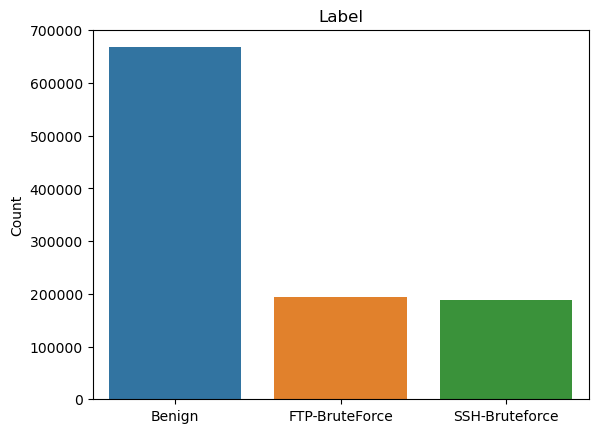

In [5]:
sns.countplot(data = df, x="Label")
plt.xlabel("")
plt.ylabel("Count")
plt.title("Label")

In [6]:
df['Label'].value_counts()

Label
Benign            667626
FTP-BruteForce    193360
SSH-Bruteforce    187589
Name: count, dtype: int64

In [7]:
label_encode = LabelEncoder()
df['Timestamp'] = label_encode.fit_transform(df['Timestamp'].values.ravel())
df['Label'] = label_encode.fit_transform(df['Label'].values.ravel())
df

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0,15905,112641719,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56320859.5,139.300036,56320958,56320761,0
1,0,0,16074,112641466,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56320733.0,114.551299,56320814,56320652,0
2,0,0,16243,112638623,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56319311.5,301.934596,56319525,56319098,0
3,22,6,16457,6453966,15,10,1239,2273,744,0,...,32,0.0,0.0,0,0,0.0,0.000000,0,0,0
4,22,6,16467,8804066,14,11,1143,2209,744,0,...,32,0.0,0.0,0,0,0.0,0.000000,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,80,6,24447,10156986,5,5,1089,1923,587,0,...,20,0.0,0.0,0,0,0.0,0.000000,0,0,0
1048571,80,6,24457,117,2,0,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.000000,0,0,0
1048572,80,6,24452,5095331,3,1,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.000000,0,0,0
1048573,80,6,24452,5235511,3,1,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.000000,0,0,0


In [8]:
X=df.drop('Label',axis=1)
X.head()

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,0,0,15905,112641719,3,0,0,0,0,0,...,0,0,0.0,0.0,0,0,56320859.5,139.300036,56320958,56320761
1,0,0,16074,112641466,3,0,0,0,0,0,...,0,0,0.0,0.0,0,0,56320733.0,114.551299,56320814,56320652
2,0,0,16243,112638623,3,0,0,0,0,0,...,0,0,0.0,0.0,0,0,56319311.5,301.934596,56319525,56319098
3,22,6,16457,6453966,15,10,1239,2273,744,0,...,6,32,0.0,0.0,0,0,0.0,0.000000,0,0
4,22,6,16467,8804066,14,11,1143,2209,744,0,...,6,32,0.0,0.0,0,0,0.0,0.000000,0,0


In [9]:
y=df['Label']
y.value_counts()

Label
0    667626
1    193360
2    187589
Name: count, dtype: int64

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.1, 
                                                    shuffle = True, 
                                                    random_state = 21)

In [11]:
def split_sequences(sequences, n_steps, step):
    X, y = list(), list()
    for i in range(0, len(sequences), step):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the dataset
        if end_ix > len(sequences):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [12]:
# Merge train and test X/y data to apply sequence transformation function
y_train_array = np.array(y_train)
train_set = np.c_[X_train, y_train_array]

y_test_array = np.array(y_test)
test_set = np.c_[X_test, y_test_array]

# Apply sequence transformation using time step of 25 for both train and test data
# All sensing modalities are recorded at a sampling rate of 50 Hz, which is considered sufficient for capturing human activity.

X_train, y_train = split_sequences(train_set, 100, 50)
print(X_train.shape, y_train.shape)

X_test, y_test = split_sequences(test_set, 100, 50)
print(X_test.shape, y_test.shape)   

(18873, 100, 79) (18873,)
(2096, 100, 79) (2096,)


In [13]:
y_train_onehot = pd.get_dummies(y_train).values
y_test_onehot = pd.get_dummies(y_test).values

In [14]:
X_train = X_train.astype('float32')
y_train_onehot = y_train_onehot.astype('float32')
X_test = X_test.astype('float32')
y_test_onehot = y_test_onehot.astype('float32')

In [15]:
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import Input
from keras.layers import Dense, Flatten, Dropout

In [16]:
n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], y_train_onehot.shape[1]

In [17]:
input_layer = Input(shape=(n_timesteps,n_features))

conv1 = Conv1D(filters=64, kernel_size=3, activation='relu')(input_layer) 
flat = Flatten()(conv1)
dens = Dense(64, activation = "relu")(flat)
outputs = Dense(3, activation = "softmax")(dens)

model = keras.Model(input_layer, outputs)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()



Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100, 79)]         0         
                                                                 
 conv1d (Conv1D)             (None, 98, 64)            15232     
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 64)                401472    
                                                                 
 dense_1 (Dense)             (None, 3)                 195       
                                                                 
Total params: 416899 (1.59 MB)
Trainable params: 416899 (1.59 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
train_epochs = 10
history = model.fit(X_train, y_train_onehot, epochs=train_epochs, verbose=True,  validation_split = 0.1)

Epoch 1/10


531/531 [==============================] - 6s 9ms/step - loss: 4570.5361 - accuracy: 0.6303 - val_loss: 0.9413 - val_accuracy: 0.6276
Epoch 2/10
531/531 [==============================] - 4s 8ms/step - loss: 0.9230 - accuracy: 0.6309 - val_loss: 0.9193 - val_accuracy: 0.6276
Epoch 3/10
531/531 [==============================] - 5s 9ms/step - loss: 0.9148 - accuracy: 0.6309 - val_loss: 0.9181 - val_accuracy: 0.6276
Epoch 4/10
531/531 [==============================] - 5s 10ms/step - loss: 0.9144 - accuracy: 0.6309 - val_loss: 0.9182 - val_accuracy: 0.6276
Epoch 5/10
531/531 [==============================] - 5s 9ms/step - loss: 0.9144 - accuracy: 0.6309 - val_loss: 0.9182 - val_accuracy: 0.6276
Epoch 6/10
531/531 [==============================] - 5s 9ms/step - loss: 0.9144 - accuracy: 0.6309 - val_loss: 0.9182 - val_accuracy: 0.6276
Epoch 7/10
531/531 [==============================] - 6s 11ms/step - loss: 0.9144 - accuracy: 0.6309 - val_loss: 0.9182 - val_accuracy: 0.6276

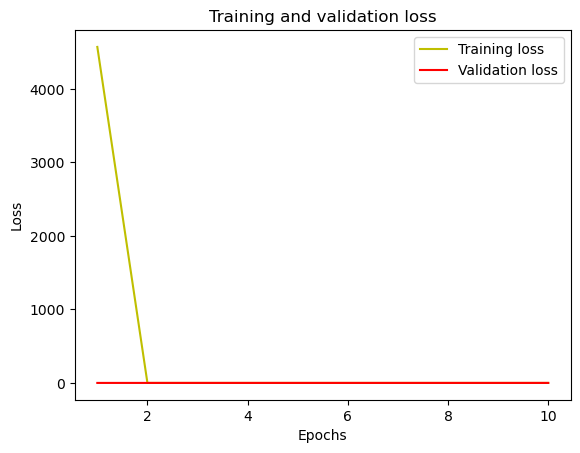

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =history.history['loss']
val_loss =history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

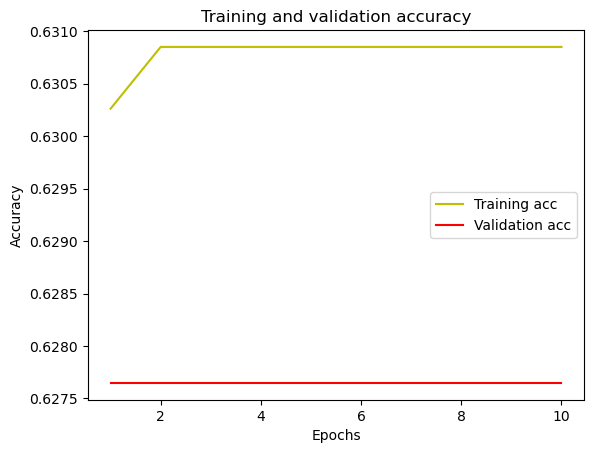

In [20]:
acc =history.history['accuracy']
val_acc =history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [21]:
from sklearn.metrics import classification_report,confusion_matrix


y_pred = model.predict(X_test)
y_test_class = np.argmax(y_test_onehot,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

66/66 [==============================] - 0s 3ms/step


In [22]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.63      1.00      0.77      1316
           1       0.00      0.00      0.00       375
           2       0.00      0.00      0.00       405

    accuracy                           0.63      2096
   macro avg       0.21      0.33      0.26      2096
weighted avg       0.39      0.63      0.48      2096

[[1316    0    0]
 [ 375    0    0]
 [ 405    0    0]]


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
